In [12]:
from ucimlrepo import fetch_ucirepo 
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In [9]:
wine_quality = fetch_ucirepo(id=186) 
  
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

y = reassign_classes(y)

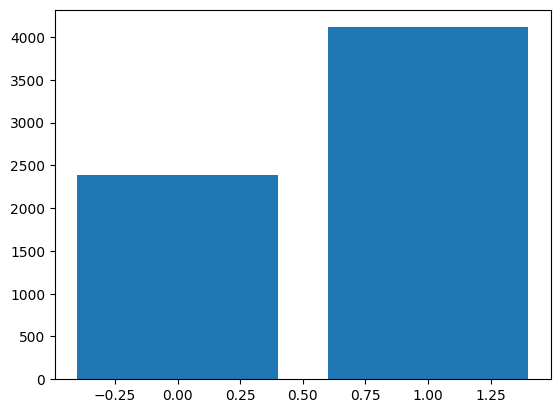

In [7]:
c = Counter()
c.update(y)
plt.bar([x for x in range(2)], c.values())
plt.show()

[6.98121723e-07 4.33130087e-08] 0
[1.50195623e-08 4.07379388e-10] 0
[9.69455245e-07 8.00666959e-07] 0
[3.86033148e-09 5.09148521e-07] 1
[2.33764320e-07 2.71503887e-08] 0
[1.25292964e-07 2.17513304e-06] 0
[5.36221536e-08 6.17809243e-06] 1
[1.10203437e-05 1.73098446e-05] 1
[1.09276022e-06 1.88237313e-07] 0
[4.38396475e-08 1.61721969e-06] 1
[8.13954497e-10 6.74259800e-09] 1
[1.50798812e-07 5.09483642e-08] 1
[3.09972333e-08 1.25120185e-09] 0
[3.98627353e-06 1.02153428e-06] 0
[3.55331616e-10 5.04952420e-09] 1
[5.25580102e-08 2.39605052e-06] 1
[8.98710506e-07 1.40924918e-06] 0
[1.15578471e-06 3.34242949e-06] 0
[9.96411671e-08 4.74083301e-06] 1
[3.79057455e-07 2.42968078e-05] 1
[1.11923444e-05 1.57518486e-05] 1
[5.82221755e-06 2.74169040e-06] 0
[5.27234490e-07 3.15099339e-07] 1
[1.94487823e-07 2.65227454e-06] 0
[1.01125751e-06 3.45895457e-07] 0
[8.76105608e-07 3.71332829e-06] 1
[8.85718542e-09 2.80792022e-06] 1
[2.47089104e-07 4.73248375e-07] 0
[1.28577640e-05 3.73479655e-06] 0
[9.74914323e-0

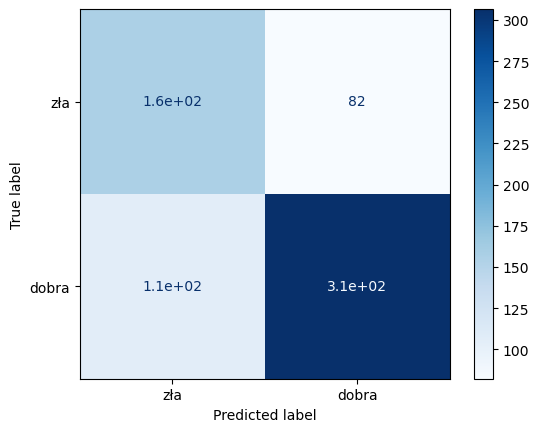

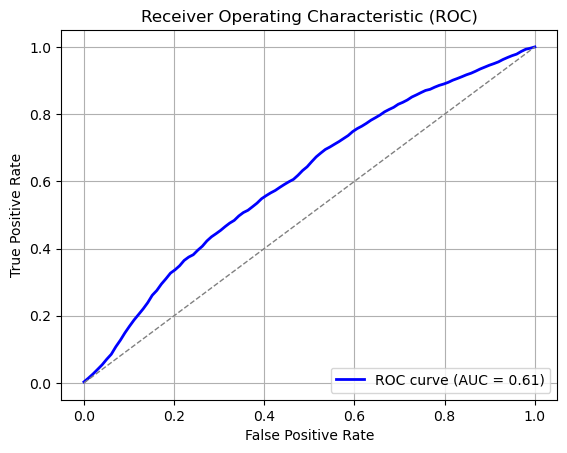

In [39]:
#################### BAYES
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for _ in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    bay = bayes.NaiveBayes()
    bay.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = bay.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)
    # y_pred = np.array(y_pred)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
# cm = cm.astype('float') / 25.0
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[0. 1.] 0
[0. 1.] 1
[1. 0.] 0
[1. 0.] 1
[1. 0.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[1. 0.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 0
[1. 0.] 0
[1. 0.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 0
[0. 1.] 1
[0. 1.] 1
[1. 0.] 1
[0. 1.] 1
[1. 0.] 0
[1. 0.] 0
[0. 1.] 1
[0. 1.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[1. 0.] 0
[0. 1.] 0
[0. 1.] 1
[1. 0.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[1. 0.] 0
[0. 1.] 1
[1. 0.] 1
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[1. 0.] 0
[0. 1.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[1. 0.] 0
[1. 0.] 0
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1


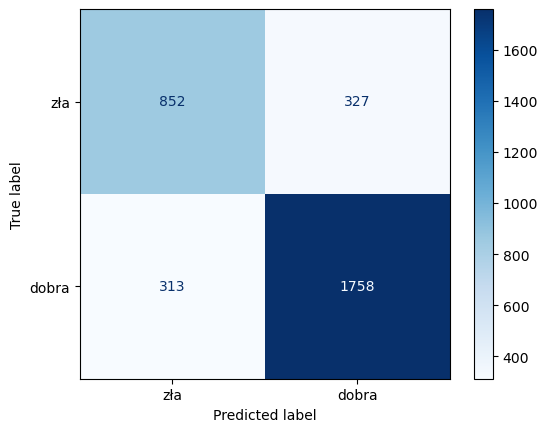

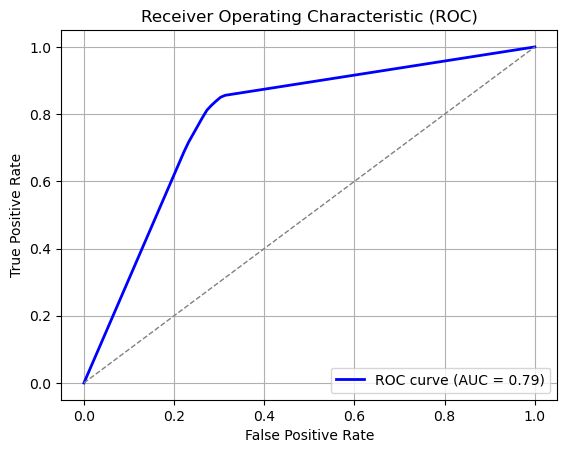

In [29]:
#################### ID3
importlib.reload(random_forest)
accuracies = []
time1 = time.time()


fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for _ in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    tree = id3.DecisionTreeClassifier(1e10)
    tree.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = tree.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0.18 0.82] 1
[0.2 0.8] 1
[0. 1.] 1
[0.04 0.96] 1
[0.2 0.8] 1
[0.58 0.42] 0
[0.06 0.94] 1
[0.4 0.6] 1
[0.2 0.8] 1
[0.02 0.98] 1
[0.14 0.86] 1
[0. 1.] 1
[0.02 0.98] 1
[0.16 0.84] 1
[0.04 0.96] 1
[0.44 0.56] 0
[0.94 0.06] 0
[0.62 0.38] 0
[0.1 0.9] 1
[0.82 0.18] 0
[0.9 0.1] 0
[0. 1.] 1
[0.96 0.04] 0
[0.92 0.08] 0
[0.08 0.92] 1
[0.38 0.62] 1
[1. 0.] 0
[0.38 0.62] 1
[0.18 0.82] 1
[0.06 0.94] 1
[0.94 0.06] 0
[0.34 0.66] 0
[0. 1.] 1
[0.02 0.98] 1
[0.26 0.74] 1
[0.18 0.82] 1
[0.18 0.82] 1
[0.84 0.16] 0
[0. 1.] 1
[0.78 0.22] 0
[0.16 0.84] 0
[0.56 0.44] 0
[0.02 0.98] 1
[0.36 0.64] 1
[0. 1.] 1
[0.32 0.68] 0
[0.1 0.9] 1
[0.06 0.94] 1
[0.3 0.7] 1
[0.24 0.76] 1
[0.84 0.16] 0
[0.08 0.92] 1
[0.94 0.06] 0
[0.02 0.98] 1
[0.88 0.12] 0
[0. 1.] 1
[0.64 0.36] 0
[0.5 0.5] 0
[0.3 0.7] 1
[0.82 0.18] 0
[0.8 0.2] 0
[0.22 0.78] 1
[0.38 0.62] 1
[0.36 0.64] 1
[0.86 0.14] 0
[0.1 0.9] 1
[0.16 0.84] 1
[0. 1.] 1
[0.22 0.78] 1
[0.94 0.06] 0
[0.1 0.9] 1
[0.8 0.2] 1
[0.94 0.06] 0
[0.1 0.9] 1
[0.96 0.04] 0
[0.84 0.16] 0
[0

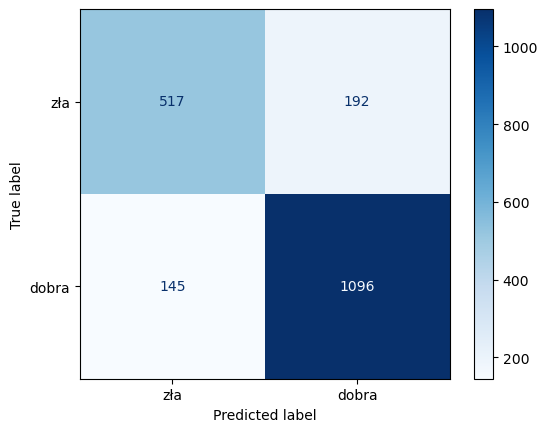

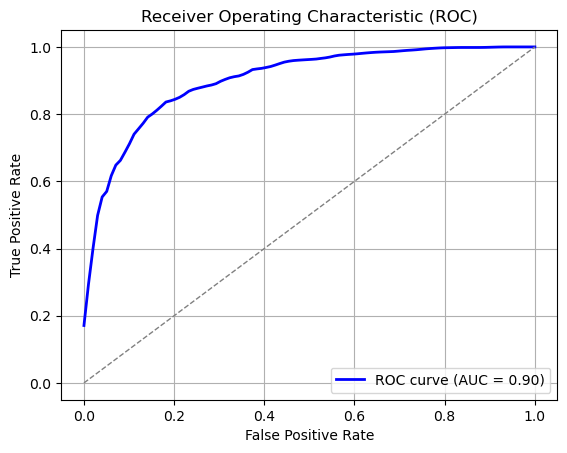

In [33]:
#################### RANDOM FOREST ID3 100%
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for _ in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)
    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0.8 0.2] 0
[0.9 0.1] 1
[1. 0.] 0
[0.32 0.68] 0
[0.4 0.6] 1
[0.14 0.86] 1
[0.1 0.9] 1
[0.1 0.9] 1
[0.9 0.1] 0
[0.8 0.2] 0
[0.02 0.98] 1
[0.7 0.3] 0
[0.12 0.88] 1
[0.34 0.66] 1
[0.04 0.96] 1
[0.9 0.1] 0
[0.88 0.12] 0
[0.42 0.58] 1
[0.5 0.5] 0
[0.12 0.88] 1
[0.2 0.8] 1
[0. 1.] 1
[0.06 0.94] 1
[0.08 0.92] 0
[0.08 0.92] 1
[0.18 0.82] 1
[0.32 0.68] 0
[0.12 0.88] 1
[0.16 0.84] 1
[0.04 0.96] 1
[0.18 0.82] 1
[0.5 0.5] 1
[0.88 0.12] 0
[0.82 0.18] 0
[0.92 0.08] 0
[0.7 0.3] 1
[0.52 0.48] 0
[0.66 0.34] 1
[0.84 0.16] 0
[0.24 0.76] 1
[0.12 0.88] 1
[0.7 0.3] 0
[0.26 0.74] 1
[0.2 0.8] 0
[0.74 0.26] 0
[0.08 0.92] 0
[0.64 0.36] 0
[0.32 0.68] 0
[0.1 0.9] 1
[0.04 0.96] 1
[0.28 0.72] 1
[0.48 0.52] 1
[0.26 0.74] 0
[0.08 0.92] 1
[0.24 0.76] 0
[0.44 0.56] 0
[0.06 0.94] 1
[0.52 0.48] 1
[0.2 0.8] 1
[0.52 0.48] 1
[0.04 0.96] 1
[0.2 0.8] 1
[0.52 0.48] 1
[0.74 0.26] 0
[0.2 0.8] 1
[0.62 0.38] 1
[0.2 0.8] 1
[0.34 0.66] 1
[0.82 0.18] 0
[0.1 0.9] 1
[0.04 0.96] 1
[0.96 0.04] 0
[0.04 0.96] 1
[0.8 0.2] 0
[0.34 0.66] 0
[0

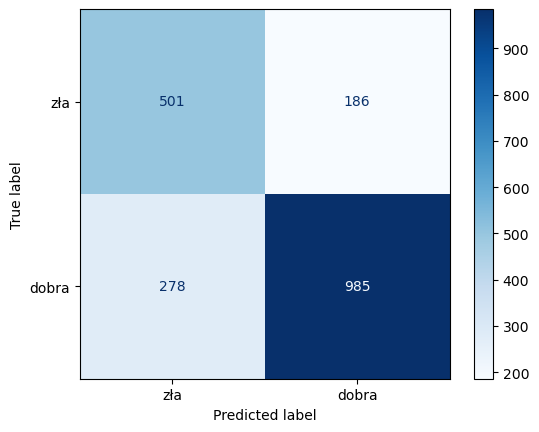

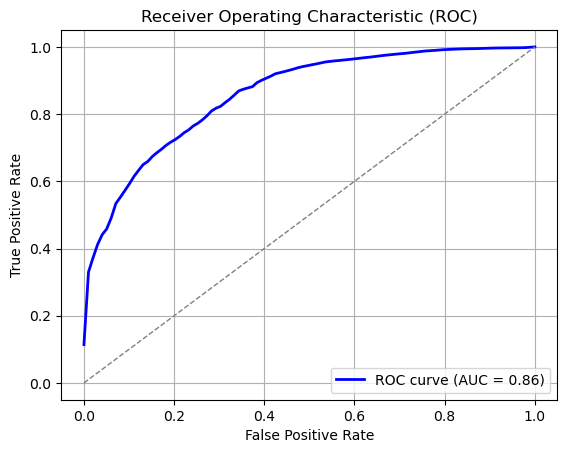

In [32]:
#################### RANDOM FOREST ID3/BAYES 50/50
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for _ in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=0.5)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()